<a href="https://colab.research.google.com/github/nurmayadi/learn-machine-learning/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Classification

Fitra Nurmayadi

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

#Data Preparation

Get Dataset MNIST from Keras Library

In [3]:
mnist = tf.keras.datasets.mnist 

Split Dataset to Train and Test set

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Check example of data

In [12]:
X_train.shape, Y_train.shape

((60000, 28, 28), (60000,))

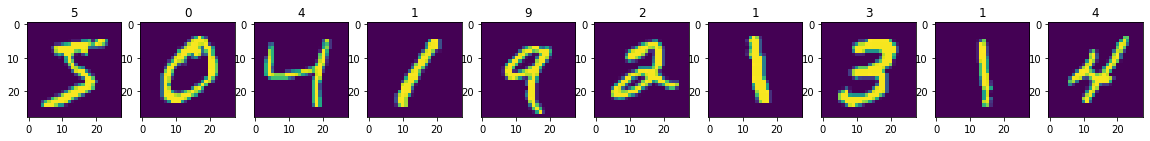

In [17]:
fig, ax = plt.subplots(nrows= 1, ncols=10, figsize=(20,2))
for i in range(0,10):
  ax[i].imshow(X_train[i])
  ax[i].set_title(Y_train[i])

#Data Normalization

In [18]:
X_train = X_train/255.0
X_test = X_test/255.0

#Create Model

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [35]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                7850      
                                                                 
 dense_12 (Dense)            (None, 20)                220       
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
Total params: 8,280
Trainable params: 8,280
Non-trainable params: 0
_________________________________________________________________


#Train Model

In [37]:
hist = model.fit(
    X_train,
    Y_train,
    epochs=10,
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4908 - accuracy: 0.8526
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2696 - accuracy: 0.9233
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2394 - accuracy: 0.9301
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2206 - accuracy: 0.9363
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2061 - accuracy: 0.9391
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1968 - accuracy: 0.9418
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1889 - accuracy: 0.9445
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1816 - accuracy: 0.9464
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1762 - accuracy: 0.9487
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.172

#Plot Accuracy

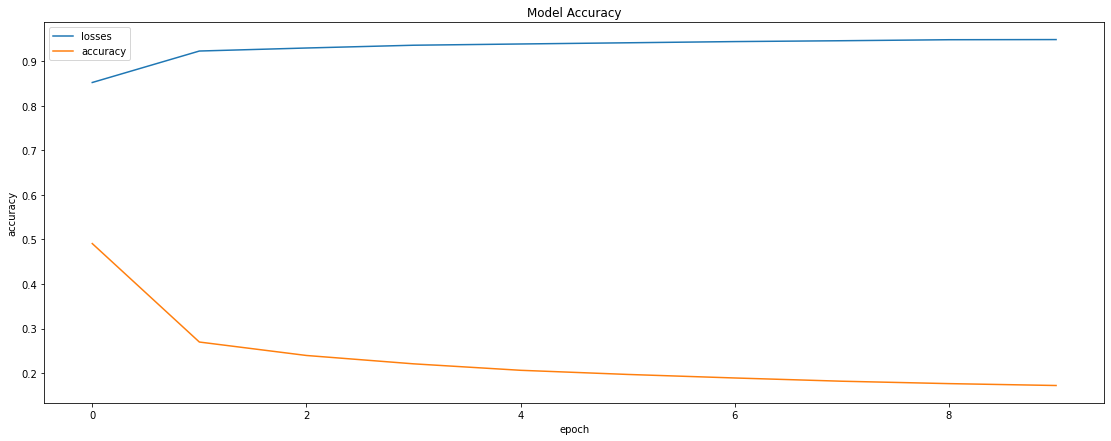

In [40]:
plt.figure(figsize=(19,7))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['losses', 'accuracy'], loc='best')
plt.show()

In [42]:
loss_acc = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(loss_acc[0],loss_acc[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.1867 - accuracy: 0.9432
Test set
  Loss: 0.187
  Accuracy: 0.943


#Model Predict

1/1 [==============================] - 0s 17ms/step


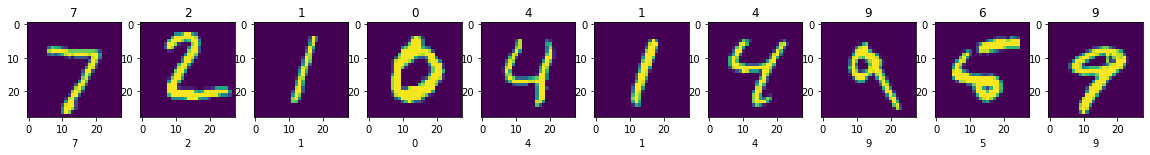

In [71]:
fig, ax = plt.subplots(nrows= 1, ncols=10, figsize=(20,2))
for i in range(0,10):
  prediction = model.predict(X_test[i])
  prediction = np.argmax(prediction)
  ax[i].imshow(X_test[i])
  ax[i].set_title(prediction)
  ax[i].set_xlabel(Y_test[i])

#Save Model

In [51]:
model.save('mnist_model.hdf5')